Machine Learning Exercise Sheet 2 - Ludwig Neste
===

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [1]:
from IPython.display import Markdown as md

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Exercise 1: A Primer on Statistics

In this exercise we need to use Bayes Law: 
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{\sum_i P(B|i)P(i)}
$$

In [3]:
s = 0.8 # Sensitvity
fp = 0.01 # False Positive
p = 5/1000 # probability of being suspect

### (a)

In [4]:
answ1 = s*p/(s*p+fp)
md(r"$P(\textrm{Suspect}|\textrm{Identified as Suspect}) = \frac{P(\textrm{Identified as Suspect}|\textrm{Suspect})P(\textrm{Suspect})}{P(\textrm{Identified as Suspect})} "+f"={answ1*100:.2f}\%$")

$P(\textrm{Suspect}|\textrm{Identified as Suspect}) = \frac{P(\textrm{Identified as Suspect}|\textrm{Suspect})P(\textrm{Suspect})}{P(\textrm{Identified as Suspect})} =28.57\%$

### (b)

In [5]:
answ2 = 1-answ1
md(r"$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})"+f"={answ2*100:.2f}\%$")

$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})=71.43\%$

### (c)

In [6]:
# new params
fp = 0.001 # False Positive
N_train = 12e6
p1 = 175_395/(N_train+175_395) # probability of being suspect
p2 =  17_539/(N_train+ 17_539) # probability of being suspect
p3 =   1_753/(N_train+  1_753) # probability of being suspect

answ3 = s*p1/(s*p1+fp)
answ4 = s*p2/(s*p2+fp)
answ5 = s*p3/(s*p3+fp)

md(r"$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})"+f"={(1-answ3)*100:.2f}\%$")

$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})=7.98\%$

In [7]:
md(r"$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})"+f"={(1-answ4)*100:.2f}\%$")

$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})=46.13\%$

In [8]:
md(r"$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})"+f"={(1-answ5)*100:.2f}\%$")

$P(\textrm{No Suspect}|\textrm{Identified as Suspect}) = 1-P(\textrm{Suspect}|\textrm{Identified as Suspect})=89.54\%$

## Exercise 2

I would prefer ridge regression. 
The situation is as follows: we have way more features than datapoints. If we use normal least squares, this is equivalent of fitting a function in a 20,000 dimensional space with 10 datapoints. If our hypothesisclass is reasonably large (For example all affine functions), there will be an infinite number of parameters, which will give a squared error of 0. A easier example to see this is to fit a line through one datapoint in 2D: You can rotate the line around the point and get a 0 squared error. 
Ridge regression adds the condition, that the fit parameters are minimal too! So in ridge regression there will be a clear minimum. (This is a similar problem like in Exercise 4)

## Exercise 3

### (a)
$$
\mathrm{pdf}_{\textrm{Uniform}(0, w)}(x) = 
\begin{cases}
\frac{1}{w} \textrm{  if  } x\in [0, w] \\
0 \textrm{  else  }
\end{cases}
$$
$$
L(x_1,\dots,x_n | \textrm{Uniform}(0, w)) = \prod_{i=1}^{n} \mathrm{pdf}_{\textrm{Uniform}(0, w)}(x_i )
=
\begin{cases}
\frac{1}{w^n} \quad \forall i\textrm{  if  } x_i\in [0, w]  \\
0 \quad \textrm{else  }
\end{cases}
$$

### (b)
$$
w_{\textrm{opt}} = \textrm{argmax}_{w}L(x_1,\dots,x_n | \textrm{Uniform}(0, w)) 
=
\textrm{argmax}_{w}
\begin{cases}
\frac{1}{w^n} \quad \forall i\textrm{  if  } x_i\in (0, w)  \\
0 \quad \textrm{else  }
\end{cases}
=\textrm{argmax}_{w | w>=max(x_i)} \frac{1}{w^n}  \\
= \textrm{argmax}_{w | w>=max(x_i)} \frac{1}{w}
= max(x_i)
$$
This works under the assumption that no $x_i$ is less than 0. This should work, since it is drawn from some Uniform distribution from 0 to $w$.

## Exercise 4

### (a)
(Now $L$ is for Loss-Function, not Likelihood anymore)
$$
L(\vec w) = \sum_{l=0}^{M-1} (\vec w^T \vec x_l - y_l)^2 + \lambda \vec w^{\mathrm T} \vec w 
= \sum_{l=0}^{M-1} (\vec x_l^T\vec w - y_l)^2 + \lambda \vec w^{\mathrm T} \vec w 
$$

$$
\nabla_{\vec w}L \big|_{\vec w = \vec w_{\mathrm{opt}}}
= \sum_{l=0}^{M-1} 2\vec x_l (\vec x_l^T\vec w_{\mathrm{opt}} - y_l) + 2 \lambda\vec w _{\mathrm{opt}}
\overset{!}{=} 0\\
\Leftrightarrow 
\sum_{l=0}^{M-1} \vec x_l \vec x_l^T\vec w_{\mathrm{opt}} + \lambda\vec w_{\mathrm{opt}} 
= \left(\sum_{l=0}^{M-1} \vec x_l \vec x_l^T + \lambda \mathbb{1}_{M\times M}\right)\vec w_{\mathrm{opt}}
= A_{\mathrm{Ridge}}\vec w_{\mathrm{opt}}
= \sum_{l=0}^{M-1} \vec x_l y_l
= \vec b
\Leftrightarrow 
\vec w_{\mathrm{opt}} = A_{\mathrm{Ridge}}^{-1} \vec b
$$
Where the last step of course assumes, that $A_{\mathrm{Ridge}}$ is invertable.

### (b)
I am not going to use singular values in my argumentation, it should be still correct though.

1. $A_{\mathrm{Ridge}}$ is symmetric: $A_{\mathrm{Ridge}} = A_{\mathrm{Ridge}}^{\mathrm T}$
2. Thus $A_{\mathrm{Ridge}}$ can be diagonalized: $\exists U = U^{-1\mathrm T},$ so that $U^{\mathrm T}A_{\mathrm{Ridge}} U = \mathrm{diag}(\mu_0, \dots, \mu_{M-1})$ With Eigenvalues $\mu_i$.
3. The diagonalized matrix is invertable, if and only if no eigenlvalue is zero, since the inverse of a diagonal matrix is the diagonal matrix with inverse elements. This thus means after basis transformation, that also the original matrix is only invertable under this condition.

It is left to show, that all eigenvalues of $A_{\mathrm{Ridge}}$ are not 0. For simplicity call $A_{\mathrm{Ridge}}$ $A$ from now on.

$$
A\vec y = \mu \vec y = \left(\sum_{l=0}^{M-1} \vec x_l \vec x_l^T + \lambda \mathbb{1}_{M\times M}\right) \vec y
\Leftrightarrow 
\sum_{l=0}^{M-1} \vec x_l \vec x_l^T \vec y = (\mu-\lambda) \vec y
$$
with $\tilde \mu = (\mu-\lambda)$ we can rewrite that as:
$$
(\sum_{l=0}^{M-1}\vec x_l \vec x_l^T) \vec y = \tilde \mu y
$$.
The eigenvalues of a matrix $A+B=C$ are the obviously the sum of the eigenvalues of $A$ and $B$.

So we can look at the Eigenvalues of $\vec x_l \vec x_l^T$:

$$
\vec x_l \vec x_l^T \vec y 
=(\vec x_l \vec x_l^T) \vec y 
=\vec x_l (\vec x_l^T \vec y) 
= \vec x_l(\vec x_l \cdot \vec y)
= (\vec x_l \cdot \vec y)\vec x_l
=
\tilde \mu_l \vec y
$$

This has two obvious solutions: 
1. The eigenvalue is 0 and the eigenvectors are all the linear independent vectors at right angle to $\vec x_l$. In $N$ Dimensions, there are $N-1$ such vectors. So the multiplicity of eigenvalue 0 is $N-1$.
2. The Eigenvector is $\vec y = \vec x_l$ and the eigenvalue is $\tilde \mu_l = (\vec x_l \cdot \vec x_l) = || \vec x_l ||^2 \geq 0$. ($\cdot$ means standard scalar product)

These are all the eigenvalues, since we just found $N-1+1=N$ eigenvalues.

This means definetly all eigenvalues are $\tilde \mu_l \geq 0$. This in turn means: 
$$
\mu-\lambda=\tilde \mu = \sum_{l=0}^{M-1} \tilde \mu_l \geq 0 
\Leftrightarrow
\mu \geq \lambda > 0
$$
This means all eigenvalues $\mu$ are greater than 0 and the matrix is thus invertable.
($\lambda>0$ not given in this exercise, but this has to be assumed. For $\lambda=0$ we have normal least squares, not ridge regression, and for some negatve lambdas there might not even exist a minimum at all. (E.g. choose  some $\lambda$ so that $-\lambda >> (\mathrm{max}x_i)^2$).

## Exercise 5: Gradient decent:

In [9]:
# My Favorite Programming Language is rust. But I don't want to get into interfacing rust with python in a notebook.
# So for this exercise my favorite language is 'numpy' ;)
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def grad_decent(f, grad_f, x0, tol=1e-5, learning_rate=0.1):
    """
    Very basic implementation of the gradient decent mathod in python. Constant learning_rate. Using analytical gradient.
    Inputs:
        f:      the scalar function taking N-dimensional numpy array as input.
        grad_f: the N-dimensional gradient function taking N-demensional numpy array as input.
        x0:     N-dimensional starting point for optimization
        tol:    tolerance
        learning_rate: learning rate
    Output:
        (min, vals)
    """
    tol = tol**2
    pos = x0
    grad = grad_f(pos)
    vals = [f(pos)]
    
    while np.inner(grad, grad) >= tol:
        pos = pos - learning_rate*grad
        grad = grad_f(pos)
        vals += [f(pos)]
    
    return pos, vals

In [11]:
# define the test functions
def sphere(w):
    return np.inner(w, w)
def grad_sphere(w):
    return 2*w

def rosenbrock(w):
    wi = w[:-1]
    wi1 = w[1:]
    return np.sum(100*(wi1-wi**2)**2+(1-wi)**2)
def grad_rosenbrock(w):
    gf = np.array([2*(w[0]-1)-400*w[0]*(w[1]-w[0]**2)])
    gl = np.array([200*(w[-1]-w[-2]**2)])
    if w.size > 2:
        wi = w[1:-1]
        wi1 = w[2:]
        wim1 = w[0:-2]
        ret = 202*wi-200*wim1**2-200*wi*(wi1-wi**2)-2 
        return np.concatenate((gf, ret, gl))
    else:
        return np.concatenate((gf, gl))

def rastrigin(w, A=10):
    n = w.size 
    return A*n+np.sum(w**2-A*np.cos(2*np.pi*w))
def grad_rastrigin(w, A=10):
    return 2*w+A*2*np.pi*np.sin(2*np.pi*w)

In [12]:
def plot(vals, name, dim):
    plt.cla()
    plt.plot(vals)
    plt.xlabel("Iteration")
    plt.ylabel("$f(x)$")
    plt.title(f"Gradient Decent of '{name}' in $n={dim}$ Dimension. {len(vals)} Iterations")
    plt.grid()
    plt.yscale("log")
    plt.tight_layout()

In [13]:
n = 2

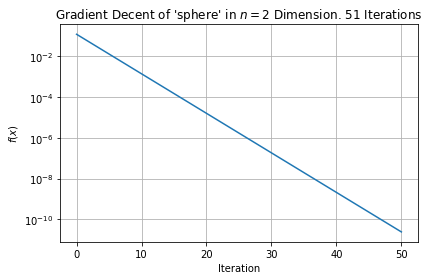

In [14]:
min_pos, vals = grad_decent(sphere, grad_sphere, np.random.normal(size=n))
plot(vals, "sphere", n)

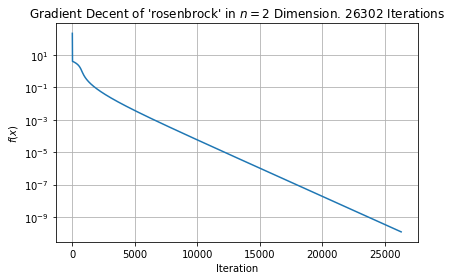

In [15]:
min_pos, vals = grad_decent(rosenbrock, grad_rosenbrock, np.random.normal(size=n), learning_rate=0.001)
plot(vals, "rosenbrock", n)

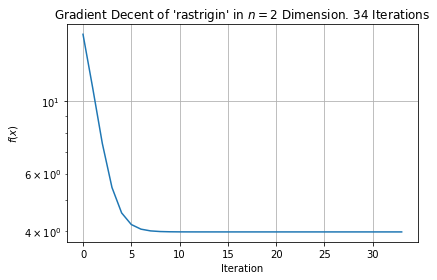

In [16]:
min_pos, vals = grad_decent(rastrigin, grad_rastrigin, np.random.normal(size=n), learning_rate=0.001)
plot(vals, "rastrigin", n)

The learning rate $\eta$ has to be adapted, to the scale of the 'landscape' of the function. 

This means: if the function changes on the scale of $s$, then $\eta |\nabla f| \approx s$.

## (d)

In [17]:
n = 30

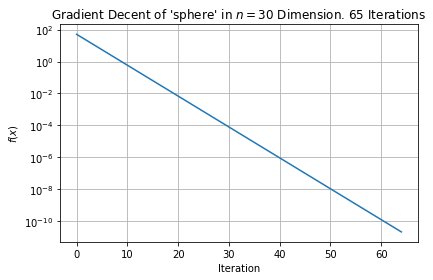

In [18]:
min_pos, vals = grad_decent(sphere, grad_sphere, np.random.normal(size=n))
plot(vals, "sphere", n)

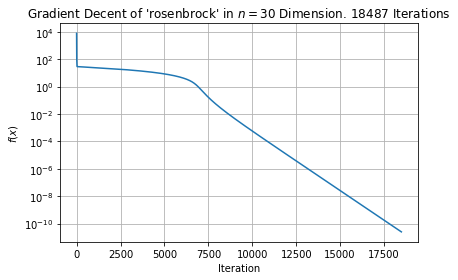

In [19]:
min_pos, vals = grad_decent(rosenbrock, grad_rosenbrock, np.random.normal(size=n), learning_rate=0.001)
plot(vals, "rosenbrock", n)

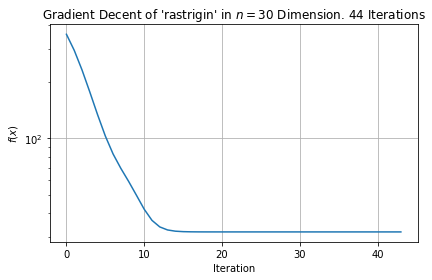

In [20]:
min_pos, vals = grad_decent(rastrigin, grad_rastrigin, np.random.normal(size=n), learning_rate=0.001)
plot(np.array(vals)-1, "rastrigin", n)

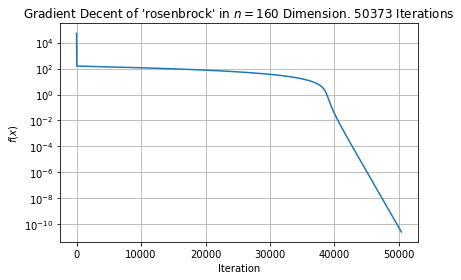

In [22]:
## Just for fun: Algorithm can handle rosenbrock with same LR to ca. 160 dim.
min_pos, vals = grad_decent(rosenbrock, grad_rosenbrock, np.random.normal(size=160), learning_rate=0.001)
plot(vals, "rosenbrock", 160)